In [1]:
import skfda
import numpy as np
import pandas as pd
import statistics
from os import listdir
from sklearn import preprocessing
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [2]:
def clustering(data, participants,f): 
    
    cost = []
    silhouette = []

    for i in range(2, participants):
        fuzzy_kmeans = skfda.ml.clustering.FuzzyCMeans(n_clusters=i, fuzzifier=f, random_state=0)
        fd = skfda.FDataGrid(data)
        fuzzy_kmeans.fit(fd)
        #kmeans.fit_predict(data)
        
        # Calculate Silhoutte Score
        score = silhouette_score(data, fuzzy_kmeans.labels_, metric='euclidean')
        silhouette.append(score)
    
        # Calculates squared error for the clustered points
        cost.append(fuzzy_kmeans.inertia_)    
        
    # Plot the cost against K values
    plt.plot(range(2, participants), cost, color ='g', linewidth ='3')
    plt.xlabel("Value of K")
    plt.ylabel("Squared Error (Cost)")
    plt.show() # clear the plot
    
    # Plot the Silhouette Score against K values
    plt.plot(range(2, participants), silhouette, color ='b', linewidth ='3')
    plt.xlabel("Value of K")
    plt.ylabel("Silhouette Score")
    plt.show() # clear the plot
    # the point of the elbow is the
    # most optimal value for choosing k
    


## SWELL

In [3]:
swell = pd.read_csv("Final_CSVs/swell_new.csv")
swell_extra = pd.read_excel('scored_surveys/swell_person.xlsx')

In [4]:
swell

,HR,RMSSD,SCL,id,dataset,stress
0,58,0.093757,119.071484,PP4,Train,0
1,999,999.000000,138.735573,PP19,Train,0
2,999,999.000000,999.000000,PP22,Train,1
3,999,999.000000,120.251942,PP3,Train,1
4,70,0.064568,561.332213,PP21,Train,0
...,...,...,...,...,...,...
3135,999,999.000000,158.138912,PP24,Test,1
3136,999,999.000000,999.000000,PP22,Test,1
3137,999,999.000000,93.893556,PP4,Test,0
3138,999,999.000000,999.000000,PP23,Test,0


In [5]:
swell_extra

,PP,Age,Gender,Occupation,Dominant hand,Glasses,smoke,coffee,alcohol,physical,stress,heart disease,medicine,Internal control index
0,PP1,27,m,student,right,no,6,6,6,6,6,no,no,2.93
1,PP2,25,m,student,right,no,6,6,6,4,5,no,no,4.25
2,PP3,24,m,student,right,no,6,6,6,6,6,no,no,3.61
3,PP4,24,m,student,right,no,6,6,6,2,6,no,no,3.61
4,PP5,24,f,student,right,no,6,6,6,6,6,no,no,3.71
5,PP6,24,m,student,right,no,6,6,6,6,6,no,no,3.86
6,PP7,22,m,student,right,no,6,6,6,6,6,no,no,3.64
7,PP8,27,m,MSc Electrical Engineering,right,yes,6,6,6,3,6,no,no,3.57
8,PP9,28,m,PhD informatics,right,no,6,6,6,2,6,no,no,3.25
9,PP10,25,m,Information Science,right,no,6,6,6,6,6,no,no,3.39


In [6]:
# Drop unnecessary features

swell_extra.drop(['heart disease'], axis=1, inplace=True)
swell_extra.drop(['medicine'], axis=1, inplace=True)
swell_extra.drop(['Glasses'], axis=1, inplace=True)
swell_extra.drop(['smoke'], axis=1, inplace=True)
swell_extra.drop(['alcohol'], axis=1, inplace=True)

In [7]:
# Group all Master students in one category

swell_extra['Occupation'] = np.where(swell_extra['Occupation']=="MSc Electrical Engineering","MSc", swell_extra['Occupation'])
swell_extra['Occupation'] = np.where(swell_extra['Occupation']=="Master MKE", "MSc", swell_extra['Occupation'])
swell_extra['Occupation'] = np.where(swell_extra['Occupation']=="MSc Technische Informatica", "MSc", swell_extra['Occupation'])

swell_extra['Occupation'] = np.where(swell_extra['Occupation']=="Computer Engineering", "student", swell_extra['Occupation'])
swell_extra['Occupation'] = np.where(swell_extra['Occupation']=="Physics", "student", swell_extra['Occupation'])
swell_extra['Occupation'] = np.where(swell_extra['Occupation']=="Information Science", "student", swell_extra['Occupation'])


swell_extra['Occupation'] = np.where(swell_extra['Occupation']=="Icelandic", "other", swell_extra['Occupation'])
swell_extra['Occupation'] = np.where(swell_extra['Occupation']=="Photography", "other", swell_extra['Occupation'])
swell_extra['Occupation'] = np.where(swell_extra['Occupation']=="Technische bestuurskunde", "other", swell_extra['Occupation'])

# Group all PhD students in one category

swell_extra['Occupation'] = np.where(swell_extra['Occupation']=="PhD informatics", "PhD", swell_extra['Occupation'])
swell_extra['Occupation'] = np.where(swell_extra['Occupation']=="student (Phd?)", "PhD", swell_extra['Occupation'])
swell_extra['Occupation'] = np.where(swell_extra['Occupation']=="PhD candidate", "PhD", swell_extra['Occupation'])

In [8]:
# Label Encoding categorical features

le = preprocessing.LabelEncoder()

swell_extra['Occupation'] = le.fit_transform(swell_extra['Occupation'])
swell_extra['Dominant hand'] = le.fit_transform(swell_extra['Dominant hand'])
swell_extra['Gender'] = le.fit_transform(swell_extra['Gender'])

In [9]:
swell_extra

,PP,Age,Gender,Occupation,Dominant hand,coffee,physical,stress,Internal control index
0,PP1,27,1,3,1,6,6,6,2.93
1,PP2,25,1,3,1,6,4,5,4.25
2,PP3,24,1,3,1,6,6,6,3.61
3,PP4,24,1,3,1,6,2,6,3.61
4,PP5,24,0,3,1,6,6,6,3.71
5,PP6,24,1,3,1,6,6,6,3.86
6,PP7,22,1,3,1,6,6,6,3.64
7,PP8,27,1,0,1,6,3,6,3.57
8,PP9,28,1,1,1,6,2,6,3.25
9,PP10,25,1,3,1,6,6,6,3.39


In [10]:
scaler = StandardScaler()
swell_extra[["Age", "Gender", "Occupation", "Dominant hand", "coffee", "physical", "stress", "Internal control index"]] = scaler.fit_transform(swell_extra[["Age", "Gender", "Occupation", "Dominant hand", "coffee", "physical", "stress", "Internal control index"]])

In [11]:
swell_extra = swell_extra.rename(columns={"PP":"id"})
swell_extra

,id,Age,Gender,Occupation,Dominant hand,coffee,physical,stress,Internal control index
0,PP1,0.615457,0.685994,0.727171,0.294884,0.204124,0.821462,0.483739,-2.531632
1,PP2,0.000000,0.685994,0.727171,0.294884,0.204124,-0.231695,-0.272103,1.986695
2,PP3,-0.307729,0.685994,0.727171,0.294884,0.204124,0.821462,0.483739,-0.204009
3,PP4,-0.307729,0.685994,0.727171,0.294884,0.204124,-1.284851,0.483739,-0.204009
4,PP5,-0.307729,-1.457738,0.727171,0.294884,0.204124,0.821462,0.483739,0.138288
5,PP6,-0.307729,0.685994,0.727171,0.294884,0.204124,0.821462,0.483739,0.651734
6,PP7,-0.923186,0.685994,0.727171,0.294884,0.204124,0.821462,0.483739,-0.101320
7,PP8,0.615457,0.685994,-1.869867,0.294884,0.204124,-0.758273,0.483739,-0.340928
8,PP9,0.923186,0.685994,-1.004188,0.294884,0.204124,-1.284851,0.483739,-1.436280
9,PP10,0.000000,0.685994,0.727171,0.294884,0.204124,0.821462,0.483739,-0.957064


In [12]:
swell_all_features = swell[['id', 'HR', 'RMSSD', 'SCL']]
swell_all_features

,id,HR,RMSSD,SCL
0,PP4,58,0.093757,119.071484
1,PP19,999,999.000000,138.735573
2,PP22,999,999.000000,999.000000
3,PP3,999,999.000000,120.251942
4,PP21,70,0.064568,561.332213
...,...,...,...,...
3135,PP24,999,999.000000,158.138912
3136,PP22,999,999.000000,999.000000
3137,PP4,999,999.000000,93.893556
3138,PP23,999,999.000000,999.000000


In [13]:
swell_mean = swell_all_features.groupby('id', as_index = False, group_keys = True).mean()
swell_mean = swell_mean.rename(columns={"HR": "HR_mean", "RMSSD": "RMSSD_mean", "SCL": "SCL_mean"})
    
swell_min = swell_all_features.groupby('id', as_index = False, group_keys = True).min()
swell_min = swell_min.rename(columns={"HR": "HR_min", "RMSSD": "RMSSD_min", "SCL": "SCL_min"})
  
swell_std = swell_all_features.groupby('id', as_index = False, group_keys = True).std()
swell_std = swell_std.rename(columns={"HR": "HR_std", "RMSSD": "RMSSD_std", "SCL": "SCL_std"})

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

swell_mean[['HR_mean', 'RMSSD_mean', 'SCL_mean']] = scaler.fit_transform(swell_mean[['HR_mean', 'RMSSD_mean', 'SCL_mean']])
swell_min[['HR_min', 'RMSSD_min', 'SCL_min']] = scaler.fit_transform(swell_min[['HR_min', 'RMSSD_min', 'SCL_min']])
swell_std[['HR_std', 'RMSSD_std', 'SCL_std']] = scaler.fit_transform(swell_std[['HR_std', 'RMSSD_std', 'SCL_std']])

In [15]:
swell_all_grouped = swell_extra.join(swell_mean.set_index('id'), on='id')
swell_all_grouped = swell_all_grouped.join(swell_min.set_index('id'), on='id')
swell_all_grouped = swell_all_grouped.join(swell_std.set_index('id'), on='id')
swell_all_grouped

,id,Age,Gender,Occupation,Dominant hand,coffee,physical,stress,Internal control index,HR_mean,RMSSD_mean,SCL_mean,HR_min,RMSSD_min,SCL_min,HR_std,RMSSD_std,SCL_std
0,PP1,0.615457,0.685994,0.727171,0.294884,0.204124,0.821462,0.483739,-2.531632,-0.900394,-0.876707,-1.222782,-0.319298,-0.294909,-1.004249,0.465365,0.439151,-0.949413
1,PP2,0.000000,0.685994,0.727171,0.294884,0.204124,-0.231695,-0.272103,1.986695,-1.646229,-1.646932,-1.230384,-0.295646,-0.294888,-0.971799,-1.217241,-1.219896,-1.822954
2,PP3,-0.307729,0.685994,0.727171,0.294884,0.204124,0.821462,0.483739,-0.204009,0.884367,0.867364,-0.548374,-0.264111,-0.294924,-0.312573,0.186334,0.249442,0.335381
3,PP4,-0.307729,0.685994,0.727171,0.294884,0.204124,-1.284851,0.483739,-0.204009,1.243265,1.247300,0.375704,-0.319298,-0.294784,-0.823730,-0.424820,-0.457861,1.405055
4,PP5,-0.307729,-1.457738,0.727171,0.294884,0.204124,0.821462,0.483739,0.138288,0.122998,0.126018,-0.862919,-0.307472,-0.294853,-0.768211,0.820475,0.816977,0.149815
5,PP6,-0.307729,0.685994,0.727171,0.294884,0.204124,0.821462,0.483739,0.651734,-0.575141,-0.550986,-1.113142,-0.323240,-0.294865,-0.861158,0.741422,0.707874,-1.239744
6,PP7,-0.923186,0.685994,0.727171,0.294884,0.204124,0.821462,0.483739,-0.101320,-1.023418,-1.017587,-0.207807,-0.323240,-0.294906,0.021783,0.272457,0.269073,0.687546
7,PP8,0.615457,0.685994,-1.869867,0.294884,0.204124,-0.758273,0.483739,-0.340928,1.656421,1.654327,1.227664,3.390077,3.391165,1.674636,-2.793593,-2.803529,1.016631
8,PP9,0.923186,0.685994,-1.004188,0.294884,0.204124,-1.284851,0.483739,-1.436280,0.450904,0.458573,2.375174,-0.323240,-0.294842,3.584380,0.682556,0.662209,-0.046574
9,PP10,0.000000,0.685994,0.727171,0.294884,0.204124,0.821462,0.483739,-0.957064,0.398311,0.406084,-0.785393,-0.315356,-0.294852,-0.630076,0.715259,0.695735,0.187333


In [16]:
# Keep user IDs in a separate datarame

ids = swell_all_grouped['id']
swell_all_grouped.drop(['id'], axis=1, inplace=True)

In [17]:
swell_all_grouped.drop(['RMSSD_min'], axis=1, inplace=True)
swell_all_grouped

,Age,Gender,Occupation,Dominant hand,coffee,physical,stress,Internal control index,HR_mean,RMSSD_mean,SCL_mean,HR_min,SCL_min,HR_std,RMSSD_std,SCL_std
0,0.615457,0.685994,0.727171,0.294884,0.204124,0.821462,0.483739,-2.531632,-0.900394,-0.876707,-1.222782,-0.319298,-1.004249,0.465365,0.439151,-0.949413
1,0.000000,0.685994,0.727171,0.294884,0.204124,-0.231695,-0.272103,1.986695,-1.646229,-1.646932,-1.230384,-0.295646,-0.971799,-1.217241,-1.219896,-1.822954
2,-0.307729,0.685994,0.727171,0.294884,0.204124,0.821462,0.483739,-0.204009,0.884367,0.867364,-0.548374,-0.264111,-0.312573,0.186334,0.249442,0.335381
3,-0.307729,0.685994,0.727171,0.294884,0.204124,-1.284851,0.483739,-0.204009,1.243265,1.247300,0.375704,-0.319298,-0.823730,-0.424820,-0.457861,1.405055
4,-0.307729,-1.457738,0.727171,0.294884,0.204124,0.821462,0.483739,0.138288,0.122998,0.126018,-0.862919,-0.307472,-0.768211,0.820475,0.816977,0.149815
5,-0.307729,0.685994,0.727171,0.294884,0.204124,0.821462,0.483739,0.651734,-0.575141,-0.550986,-1.113142,-0.323240,-0.861158,0.741422,0.707874,-1.239744
6,-0.923186,0.685994,0.727171,0.294884,0.204124,0.821462,0.483739,-0.101320,-1.023418,-1.017587,-0.207807,-0.323240,0.021783,0.272457,0.269073,0.687546
7,0.615457,0.685994,-1.869867,0.294884,0.204124,-0.758273,0.483739,-0.340928,1.656421,1.654327,1.227664,3.390077,1.674636,-2.793593,-2.803529,1.016631
8,0.923186,0.685994,-1.004188,0.294884,0.204124,-1.284851,0.483739,-1.436280,0.450904,0.458573,2.375174,-0.323240,3.584380,0.682556,0.662209,-0.046574
9,0.000000,0.685994,0.727171,0.294884,0.204124,0.821462,0.483739,-0.957064,0.398311,0.406084,-0.785393,-0.315356,-0.630076,0.715259,0.695735,0.187333


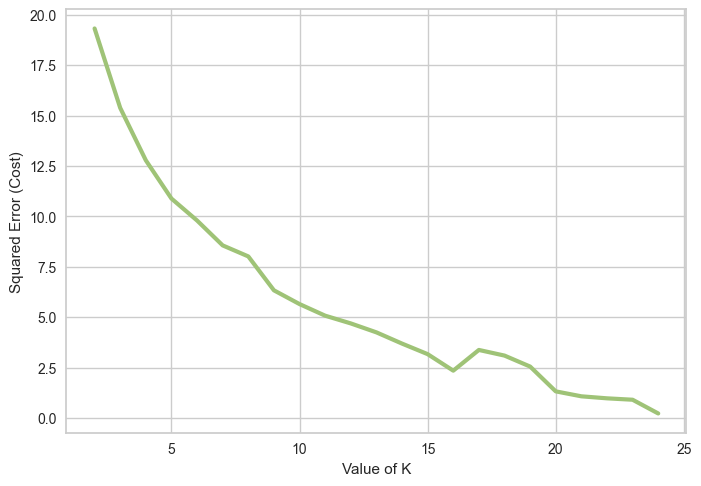

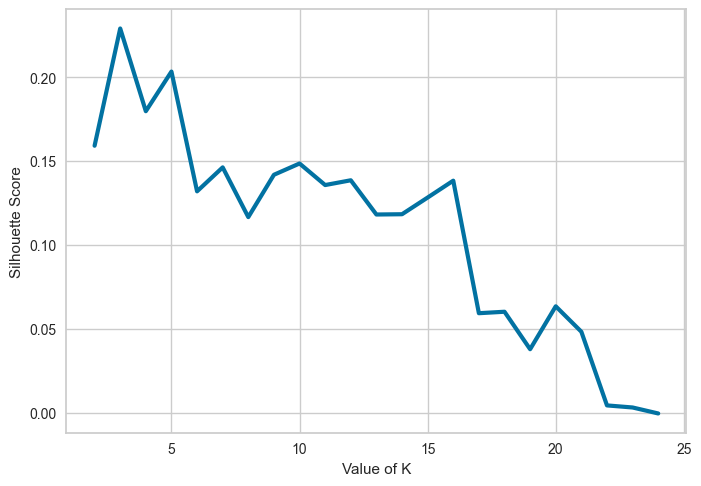

In [18]:
clustering(swell_all_grouped, 25, 1.3)

In [19]:
fuzzy_kmeans = skfda.ml.clustering.FuzzyCMeans(n_clusters=10, fuzzifier=1.3, random_state=0)
fd = skfda.FDataGrid(swell_all_grouped)
fuzzy_kmeans.fit(fd)
clusters = fuzzy_kmeans.membership_degree_ 

In [20]:
#swell

In [21]:
unique_participants = swell["id"].unique()

In [22]:
fuzzy_clustering = pd.concat([ids, pd.DataFrame(clusters)], axis=1)
fuzzy_clustering

,id,0,1,2,3,4,5,6,7,8,9
0,PP1,2.345061e-02,8.680234e-01,1.084849e-02,2.393590e-03,6.027976e-02,1.961155e-03,2.313541e-02,5.425224e-04,3.614622e-03,5.750410e-03
1,PP2,9.009507e-01,3.829581e-02,9.632200e-03,2.460425e-03,1.714039e-02,6.939498e-04,1.100780e-02,1.028103e-03,4.991428e-03,1.379916e-02
2,PP3,2.605330e-04,9.596591e-01,1.065602e-02,2.825028e-05,2.693501e-02,9.302371e-05,3.277122e-04,5.173948e-05,4.076167e-04,1.581016e-03
3,PP4,9.776750e-05,2.103565e-03,9.945214e-01,1.142914e-05,9.964982e-04,6.618408e-05,8.056327e-05,7.557302e-05,3.200741e-04,1.726967e-03
4,PP5,8.084347e-05,5.452897e-03,1.182748e-04,6.995269e-06,9.940232e-01,5.602627e-06,3.997819e-05,2.136476e-06,2.886664e-05,2.412395e-04
5,PP6,2.580352e-03,9.629441e-01,1.439037e-03,9.562699e-05,2.798659e-02,8.088847e-05,1.772573e-03,2.993155e-05,5.188331e-04,2.552094e-03
6,PP7,2.580316e-03,9.579937e-01,1.804283e-03,1.437200e-04,3.242352e-02,1.997798e-04,1.696324e-03,4.855561e-05,5.817337e-04,2.528077e-03
7,PP8,9.535534e-05,1.349954e-04,8.013503e-04,3.660955e-05,1.323081e-04,2.452552e-04,7.156855e-05,9.981510e-01,1.807962e-04,1.507210e-04
8,PP9,1.890163e-16,8.967694e-16,1.350629e-15,1.085027e-16,7.751301e-16,1.000000e+00,4.346514e-16,1.539045e-16,1.174893e-15,2.750322e-15
9,PP10,2.963643e-05,9.972147e-01,2.751664e-04,3.329172e-06,2.300516e-03,8.372121e-06,4.935607e-05,2.380747e-06,3.092099e-05,8.563923e-05


In [23]:
#for index, participant in fuzzy_clustering.iterrows():
#    for i in range(1, len(participant)):
#        print(i)

In [24]:
swell_final = pd.DataFrame()

for index, participant in fuzzy_clustering.iterrows():
    for i in range(1, len(participant)):
        temp = swell.loc[swell['id'] == participant['id']].sample(frac = participant[i-1], replace = False)
        temp["Cluster"] = i-1
        swell_final = pd.concat([swell_final, temp], axis=0)

In [25]:
#swell

In [26]:
swell_final['Cluster'].value_counts()

1    806
4    580
0    328
2    283
9    259
6    257
7    243
8    141
5    124
3    108
Name: Cluster, dtype: int64

In [27]:
swell_final.to_csv("Final_CSVs/swell_fuzzy10_14.csv", index = False)